In [47]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [48]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [49]:
# 신경망 구조
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512,activation = 'relu',input_shape=(28*28,)),
    layers.Dense(10,activation = 'softmax')
])

In [50]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [51]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [52]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [53]:
#모델 훈련
import tensorflow as tf
model.compile(optimizer='Adam',loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=['accuracy'])

In [54]:
model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2689 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1089 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0696 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0495 - accuracy: 0.9858
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0364 - accuracy: 0.9894


In [55]:
# 모델 예측
import numpy as np
x_test10 = x_test[:10]
predction = model.predict(x_test10)
np.argmax(predction[0])

1/1 [==============================] - 0s 45ms/step


7

In [56]:
y_test[0]

7

In [57]:
predction[0][7]

0.99857974

In [58]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0607 - accuracy: 0.9825


[0.06072613596916199, 0.9825000166893005]

In [65]:
# 평가 교차알고리즘 KFold
from sklearn.model_selection import KFold

In [67]:
accuracy = []
for tindex, vindex in  KFold().split(x_train):
    x_tr,x_val =  x_train[tindex],x_train[vindex]
    y_tr,y_val =  y_train[tindex],y_train[vindex]
    
    model = keras.Sequential([
        layers.Dense(512,activation = 'relu',input_shape=(28*28,)),
        layers.Dense(10,activation = 'softmax')
    ])
    model.compile(optimizer='Adam',loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=['accuracy'])
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    accuracy.append( model.evaluate(x_test,y_test)[1])    

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2684 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1086 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0697 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0508 - accuracy: 0.9851
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0657 - accuracy: 0.9799
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2669 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1093 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0708 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0491 - accuracy: 0.9858
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9781
Epoch 1/5


In [68]:
np.array(accuracy).mean()

0.9789000034332276

In [72]:
# 신경망에서 사용하는 데이터
# 스칼라(랭크-0 텐서)
x = np.array(12)
x.shape, x, x.ndim

((), array(12), 0)

In [74]:
# 벡터(랭크-1 텐서)
x = np.array([1,2,3,4])
x, x.shape, x.ndim

(array([1, 2, 3, 4]), (4,), 1)

In [79]:
# 행렬(랭크-2 텐서)
x = np.array([[1,2,3,4],[1,2,3,4]])
x, x.shape, x.ndim

(array([[1, 2, 3, 4],
        [1, 2, 3, 4]]),
 (2, 4),
 2)

In [80]:
# 랭크-3 텐서

In [81]:
x = np.array([[[1,2,3,4],[1,2,3,4]],[[1,2,3,4],[1,2,3,4]]])
x, x.shape, x.ndim

(array([[[1, 2, 3, 4],
         [1, 2, 3, 4]],
 
        [[1, 2, 3, 4],
         [1, 2, 3, 4]]]),
 (2, 2, 4),
 3)

In [82]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [83]:
x_train.ndim

3

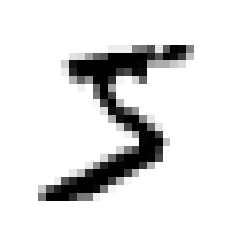

In [85]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray_r')
plt.axis('off')
plt.show()

In [87]:
y_train[0]

5

In [89]:
x_train.shape

(60000, 28, 28)

In [88]:
x_train10 = x_train[:10]
x_train10.shape

(10, 28, 28)

In [90]:
x_train10 = x_train[:10,:,:]
x_train10.shape

(10, 28, 28)

In [91]:
x_train10 = x_train[:10,:14,:14]
x_train10.shape

(10, 14, 14)

In [92]:
x_train10 = x_train[:10,:-10,:-10]
x_train10.shape

(10, 18, 18)

In [94]:
# 배치 개념
batch = x_train[:128]
batch.shape

(128, 28, 28)

In [95]:
batch = x_train[128:128*2]
batch.shape

(128, 28, 28)

In [ ]:
n = 3
batch = x_train[128*n:128*(n+1)]

In [ ]:
# 신경망이 학습한 모든 변환을  수치 데이터 텐서에 적용하는 텐서 연산으로 나타낼수 있다
# 케라스의 층은
# tf.keras.layers.Dense(512,activation='relu')
# output = relu(dot(w,input) + b)



In [125]:
x = np.array([[-2,-1,0,1,2],[1,1,1,1,1]])

In [126]:
# 원소별 연산
def naive_relu(x):
    assert len(x.shape) == 2  
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

In [136]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,y]
    return x

In [140]:
import time
x = np.random.random((20,100))
y = np.random.random((20,100))
t0 = time.time()
for i in range(1000):
    z = x + y
    z = np.maximum(z,0)
print(f"걸린시간 {time.time()-t0}")    

걸린시간 0.00600886344909668


In [141]:
for i in range(1000):
    z = x + y
    z = naive_relu(z)
print(f"걸린시간 {time.time()-t0}")    

걸린시간 49.33864188194275


In [142]:
# 브로드 캐스팅

In [150]:
import numpy as np
x = np.random.random((32,10))
y = np.random.random((10,))

In [151]:
y = np.expand_dims(y, axis=0)
y.shape
y

array([[0.49986072, 0.51940828, 0.9927293 , 0.98483502, 0.0771733 ,
        0.98008061, 0.07141996, 0.25604296, 0.8673602 , 0.56580581]])

In [153]:
y = np.concatenate([y]*32,axis = 0)

In [155]:
x.shape, y.shape

((32, 10), (32, 10))

In [ ]:
#브로드 케스팅
def niave_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2    
    assert len(x.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

In [164]:
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y)
x.shape, y.shape, z.shape

((64, 3, 32, 10), (32, 10), (64, 3, 32, 10))

In [157]:
x.shape, y.shape

((32, 10), (10,))

In [167]:
x = np.array([10,20])
y = np.array([2,3])
x, y

(array([10, 20]), array([2, 3]))

In [168]:
np.dot(x,y)

80

In [169]:
# 내적연산 dot  각 요소들끼리 곱한 결과를 합
def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0
    for i in range(x.shape[0]):
        z += x[i]*y[i]
    return z

In [180]:
def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in ranage(x.shape[1]):
            z[i] += x[i,j]*y[j] 
    return z

In [179]:
x = np.array([[1,2],[3,4]])
y = np.array([2,3])
x.shape, y.shape

((2, 2), (2,))

In [181]:
def naive_matrix_vector_dot(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:],y)
    return z

In [182]:
x = np.array([[1,2],[3,4]])
y = np.array([[1,2],[3,4]])
np.dot(x,y)

array([[ 7, 10],
       [15, 22]])

In [183]:
def naive_matrix_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], x.shape[1]) )
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i,:]
            col_y = y[:,j]
            z[i,j] =  naive_vector_dot(row_x, col_y)
    return z

In [184]:
x_train.shape

(60000, 28, 28)

In [185]:
x_train.reshape(x_train.shape[0],-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [187]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x

array([[0., 1.],
       [2., 3.],
       [4., 5.]])

In [189]:
x.reshape(-1,1)

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [193]:
x = np.zeros((300,20))
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [196]:
x.T.shape


(20, 300)

In [197]:
# 그레이디언트 기반 최적화
import tensorflow as tf

In [204]:
x = tf.Variable(0.)
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [ ]:
# 그레이디언트 테이프  주어진 입력변수.. 데이터어 대해서 자동 미분

In [226]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2*x+3   
grad_of_y_wrt_x = tape.gradient(x,y)    

In [227]:
x = tf.Variable(tf.zeros((2,2)))
with tf.GradientTape() as tape:
    y = 2*x+3   
grad_of_y_wrt_x = tape.gradient(x,y)  

In [ ]:
tf.Variable(tf.random.uniform((2,2)))

In [217]:
temp = tf.random.uniform([10],0,1)
temp

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.34458196, 0.4364164 , 0.91007257, 0.20915914, 0.68087864,
       0.51040053, 0.4364257 , 0.36259305, 0.2354405 , 0.7002871 ],
      dtype=float32)>

In [207]:
help(tf.random.uniform)

Help on function random_uniform in module tensorflow.python.ops.random_ops:

random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
    Outputs random values from a uniform distribution.
    
    The generated values follow a uniform distribution in the range
    `[minval, maxval)`. The lower bound `minval` is included in the range, while
    the upper bound `maxval` is excluded.
    
    For floats, the default range is `[0, 1)`.  For ints, at least `maxval` must
    be specified explicitly.
    
    In the integer case, the random integers are slightly biased unless
    `maxval - minval` is an exact power of two.  The bias is small for values of
    `maxval - minval` significantly smaller than the range of the output (either
    `2**32` or `2**64`).
    
    Examples:
    
    >>> tf.random.uniform(shape=[2])
    <tf.Tensor: shape=(2,), dtype=float32, numpy=array([..., ...], dtype=float32)>
    >>> tf.random.uniform(shape=[], minval=-1., maxval=0.)
    <